*** Here I explain how Metropolis_Hasting work and later I show an example:***

The explanation will be LONG!

We can apply a process as follow:

1) For $k = 1, 2, ...$ We sample x' from a distribution $Q(x^k \rightarrow x')$

2) Accept proposal x' with probability $A(x^k \rightarrow x')$

So,  $Q(x \rightarrow x')$ defines the probability to go from x to x' and $A(x \rightarrow x')$ is the so called critic which gives the probabilty of accepting the proposal. And, we can defime the transition probabilty $T(x \rightarrow x')$ which is the product of the proposed dist. and our critic. 

We want our MC to generate point from the desired distribution which a stationary state (We assume the posteriori we want to sample is a stationary state of an MC):

$\pi(x') = \sum_x \pi(x) T(x \rightarrow x')$

As the transition matrix here is a product of $Q$ and $A$ we try to find $A$ such that the above equation being sattisfied. 

Before getting to find A, there is a short cut for definition of stationary state which is:

if $\pi(x) T(x \rightarrow x') = \pi(x') T(x' \rightarrow x)$ then $\pi(x)$ is stationary. 
The proof is really easy! and is presented below:

1) We use summation operator for both sides of the equation:

$\sum_x \pi(x) T(x \rightarrow x') = \sum_x \pi(x') T(x' \rightarrow x)$

2) x' is coming out of summation because is independet of x:

$\sum_x \pi(x) T(x \rightarrow x') = \pi(x') \sum_x T(x' \rightarrow x)$

3) As sum over all the possible outcomes of gping form x' to x is one, the above equation becomes: 

$\sum_x \pi(x) T(x \rightarrow x') = \pi(x')$

***Now lets get back to our problem, we are looking for a critic such that the MC created by it will produce samples from a stationary dist. $\pi(x)$***
***So we check for a critic A such that it makes a transition matrix T that satisfies stationary state equation of the form:***

$\pi(x) T(x \rightarrow x') = \pi(x') T(x' \rightarrow x)$

This equation can be re-written as follows:

$\pi(x) Q(x \rightarrow x') A(x \rightarrow x') = \pi(x') Q(x' \rightarrow x) A(x' \rightarrow x)$ which can be re_arranges as follows:

$\frac{A(x \rightarrow x')}{A(x' \rightarrow x)} = \frac{\pi(x') Q(x' \rightarrow x)}{\pi(x) Q(x \rightarrow x')}$

Doing a bit of algebra we can show:

$A(x \rightarrow x') = min (1, \frac{\pi(x') Q(x' \rightarrow x)}{\pi(x) Q(x \rightarrow x')})$

*** To summerize the whole thing:***

For $k = 1, 2, 3, ...$ we cample from any (wrong) $Q(x^k \rightarrow x')$ and we accept the x' with probability $A(x \rightarrow x')$.  

***This method is VERY usefull when we dont know the normalization constant of our posterior dist. ***

***The algorithm is as follows:***

1) pick an initial $x_0$
 
2)Iterate:

        Generate a random candidate according to Q
        
        Calculate the acceptence probabilty A
        
        Accept or reject:
        
                Generate a randon number u from a uniform dist.
                
                if u <= A : accept
                
                else: reject
                







In [8]:
#Here is an example of a simple linear regression (y = theta*x). We define the likelihood based on the chi squared error between the prediction and true values of y for updated values of theta. 

#We assume that Q is a Gasussian dist. and we sample from it.

import math
import numpy as np
import numpy 

#define values for x and y
x = np.array([1,2,3,4, 7, 9])
y = np.array([3,6, 9, 12, 21, 27])

# the likelihood function:
def likelihood(x,y, theta):
    in_ = ((y-theta*x)**2)/len(x)
    return np.exp(-np.sum(in_))


theta_current = 0
current_likelihood = likelihood(x,y, theta_current)
chain = []

# the chain:
for i in range(5000):
    
    theta_proposed = theta_current+0.1*np.random.randn()
    proposed_likelihood = likelihood(x,y,theta_proposed)
    ratio = (proposed_likelihood)/(current_likelihood)
    A = min(1, ratio)
    
    u = np.random.rand()
    if u<= A:
        theta_current = theta_proposed
        current_likelihood = proposed_likelihood
        
    chain.append(theta_current)
    

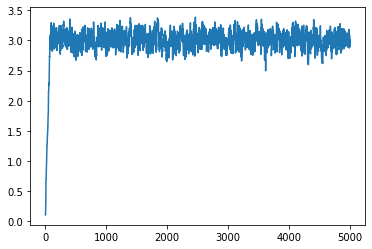

In [9]:
import matplotlib.pyplot as plt
plt.plot(chain)

In [3]:
print("the mean value for theta is:", np.mean(chain))
print("the standard deviation for theta is:", np.std(chain))

the mean value for theta is: 2.9687741520516595
the standard deviation for theta is: 0.2903606525479557


***Second Example: We want to sample from an exponential function:***
    $\pi(x) = \exp (x)$
We define an exponential function as the target, and we fun MCMC to sample from it. 
if we plot a histogram from the generated samples we clearly can see the exponential decay.  

In [4]:

def target(x):
    if x<0:
        target = 0
    else:
        target = np.exp(-x)
    return target


x_current = 0
current_target = target(x_current)
chain = []

# the chain:
for i in range(100000):
    
    x_proposed = x_current+np.random.randn()
    proposed_target = target(x_proposed)
    ratio = (proposed_target)/(current_target)
    A = min(1, ratio)
    
    u = np.random.rand()
    if u<= A:
        x_current = x_proposed
        current_taget = proposed_target
        
    chain.append(x_current)
    

(array([1.7208e+04, 1.4095e+04, 1.1862e+04, 1.0241e+04, 8.0200e+03,
        6.5560e+03, 5.5420e+03, 4.7250e+03, 3.8410e+03, 3.1750e+03,
        2.4570e+03, 2.1320e+03, 1.7200e+03, 1.5300e+03, 1.2080e+03,
        1.0040e+03, 7.7300e+02, 6.7200e+02, 6.1300e+02, 5.7900e+02,
        4.5100e+02, 3.2400e+02, 6.7000e+01, 4.3600e+02, 1.8100e+02,
        0.0000e+00, 0.0000e+00, 4.2800e+02, 1.5400e+02, 6.0000e+00]),
 array([0.        , 0.19372956, 0.38745912, 0.58118868, 0.77491824,
        0.9686478 , 1.16237737, 1.35610693, 1.54983649, 1.74356605,
        1.93729561, 2.13102517, 2.32475473, 2.51848429, 2.71221385,
        2.90594341, 3.09967297, 3.29340253, 3.4871321 , 3.68086166,
        3.87459122, 4.06832078, 4.26205034, 4.4557799 , 4.64950946,
        4.84323902, 5.03696858, 5.23069814, 5.4244277 , 5.61815726,
        5.81188683]),
 <a list of 30 Patch objects>)

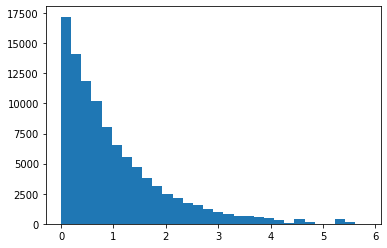

In [5]:
plt.hist(chain, bins = 30)
